In [2]:
#pip install diffusers transformers
!pip show diffusers transformers pillow accelerate

Name: diffusers
Version: 0.36.0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/diffusers/graphs/contributors)
Author-email: diffusers@huggingface.co
License: Apache 2.0 License
Location: D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages
Requires: filelock, httpx, huggingface-hub, importlib_metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 
---
Name: transformers
Version: 4.57.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-pa

# 学习AI生图

**国内运行这个！！！！！**

In [2]:
import os
os.environ["HUGGINGFACE_HUB_ENDPOINT"] = "https://hf-mirror.com"  # 核心！
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"  # 向下兼容，双保险

%matplotlib inline
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import accelerate
from PIL import Image

from huggingface_hub import hf_hub_url
download_url = hf_hub_url(
    repo_id="hakurei/waifu-diffusion",
    filename="model_index.json"
)
download_url #显示  https://hf-mirror.com/hakurei/waifu-diffusion/resolve/main/model_index.json

'https://hf-mirror.com/hakurei/waifu-diffusion/resolve/main/model_index.json'

**网络好用这个**

In [6]:
# 关键：让matplotlib图嵌入notebook显示
%matplotlib inline
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image   #（这个就是pillow）
import accelerate
from diffusers import StableDiffusionPipeline

## 先跑一个demo  

该模型**5.1G**,运行需要**4G显存**  
导入必备的包

保证设备是GPU（CUDA）

In [12]:
#这一定要保证输出的是cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

下载模型到当前目录  
下载完看一下本地目录文件位置对不对，我的在./sd-v1-5/models--sd-legacy--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592里，请把里面所有文件剪切到./sd-v1-5 (**如果出现限流，就多试几次**)

In [14]:
# 1. 定义下载目录（代码同目录的 sd-v1-5-download 文件夹）
# 相对路径（推荐）：./ 表示当前代码所在目录
download_dir = "./sd-v1-5"

# 2. 确保目录存在（如果不存在则自动创建）
os.makedirs(download_dir, exist_ok=True)

# 3. 加载模型时指定下载目录（核心：cache_dir 参数）
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    cache_dir=download_dir,  # 指定模型下载到当前目录
).to("cuda")

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

model_index.json: 0.00B [00:00, ?B/s]

D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\cs\NotebookWorkspace\pytorch-study\sd-v1-5\models--sd-legacy--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

1464

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

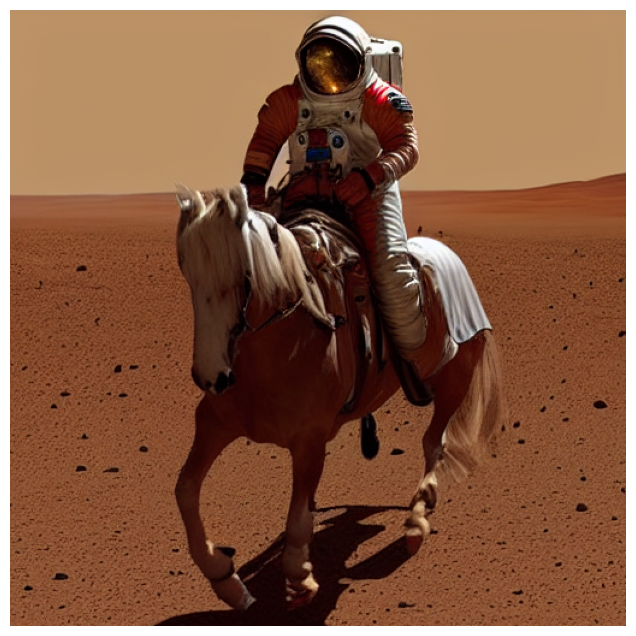

1623

In [15]:
# 加载模型
model_path = "./sd-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

#优化效果（4G显存要用用）
from diffusers import EulerDiscreteScheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

## 学习StableDiffusion 的使用

### 文生图 和 学习参数

prompt	               正向提示词：告诉 SD 要生成什么   
negative_prompt	       反向提示词：告诉 SD 不要生成什么   	   
num_inference_steps	   采样步数：反向扩散的迭代次数（UNet 去噪的次数）   	
guidance_scale (CFG)   文本引导尺度：控制图像贴合提示词的程度	   
height/width	       生成图像的尺寸（必须是 64 的倍数，SD 默认 512x512）   
generator	           随机数生成器：固定种子可复现相同图像   
batch_size             批量大小，一次生成的图片数量

标签超市：https://tags.novelai.dev/   
github：https://github.com/wfjsw/danbooru-diffusion-prompt-builder  

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

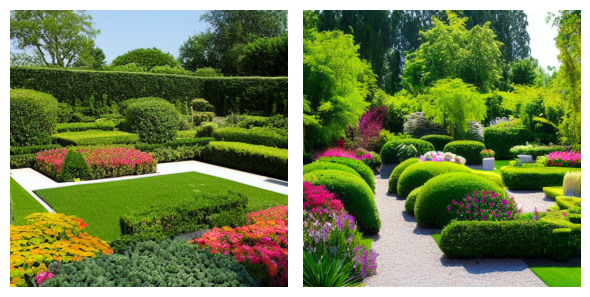

31

In [16]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    safety_checker=None,              # 关闭安全检查器实例（支持NSFW）
    requires_safety_checker=False,    # 禁用安全检查器依赖
).to("cuda")

#优化效果（4G显存要用用）
from diffusers import EulerDiscreteScheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

#正向提示词
prompt = "garden, masterpiece, best quality"
#反向提示词
negative_prompt = "bad anatomy, missing arms, bad hands, ponytail, lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 2
generator = torch.Generator("cuda").manual_seed(42)  # 固定种子

images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    generator=generator  # 固定种子
).images

#画图可视化（2张图按2行1列展示）
fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # 2行2列，画布大小12x12
axes = axes.flatten()                             # 把2x2的坐标轴转成一维列表，方便循环

# 循环显示每张图
for idx, img in enumerate(images):
    axes[idx].imshow(img)  # 显示图片
    axes[idx].axis("off")  # 隐藏坐标轴，更美观

# 调整子图间距，避免重叠
plt.tight_layout()
plt.show()


#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

### 图生图

In [5]:
from diffusers import StableDiffusionImg2ImgPipeline

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

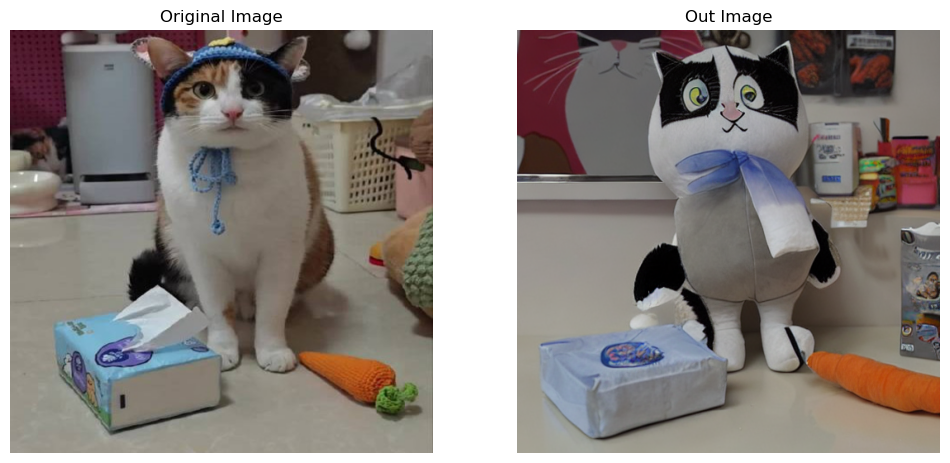

5190

In [16]:
model_path = "./sd-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    safety_checker=None,
    requires_safety_checker=False
).to("cuda")

# 2. 加载参考图（替换为你的图片路径）
init_image = Image.open("./data/StableDiffusion/carrot_paper_cat.jpg").resize((512, 512))

# 3. 定义提示词（目标风格）
prompt = "in the middle is a cat, in the lower left corner is a pack of tissues, and in the lower right corner is a plush carrot toy, cartoon style, masterpiece, best quality"
negative_prompt = "lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

# 4. 图生图（strength=0.6 控制重绘强度，0-1）
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=init_image,
    strength=0.6,  # 0.2=轻微修改，0.8=大幅重绘
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

# 5. 对比显示原图和生成图
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.imshow(init_image)
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(image)
ax2.set_title("Out Image")
ax2.axis("off")

plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

### Waifu Diffusion (动漫图片:文生图)

下载完记得手动移一下模型位置  
该模型**6G**左右，运行需要**3G显存**

In [5]:
download_dir = "./waifu-sd-v1-4-2"
os.makedirs(download_dir, exist_ok=True)

model_id = 'hakurei/waifu-diffusion'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    cache_dir=download_dir, 
)

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

model_index.json: 0.00B [00:00, ?B/s]

D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\cs\NotebookWorkspace\pytorch-study\waifu-sd-v1-4-2\models--hakurei--waifu-diffusion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


**以下两个代码一样的**

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

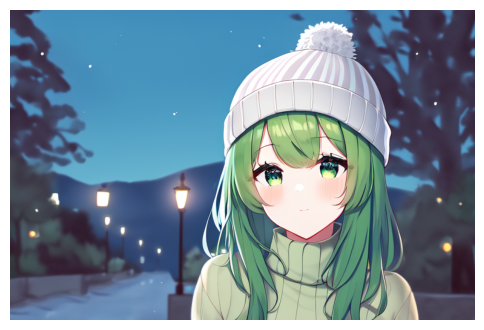

1623

In [26]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_path = './waifu-sd-v1-4'
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    safety_checker=None,        # 关闭安全检查器，节省显存
    requires_safety_checker=False
).to("cuda")

# 切换高效采样器（减少步数+速度）
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

# 生图参数
prompt = "masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck"
negative_prompt = "lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

# 关键参数：分辨率/步数/批量数（6G显存极限配置）
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,  
    guidance_scale=7.5,       
    width=768,              
    height=512,
    num_images_per_prompt=1,
    generator = torch.Generator("cuda").manual_seed(1919810)    #多了个可复现种子
).images[0]

# 6. 显示图片
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

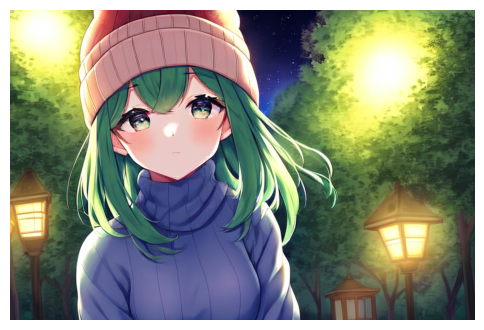

2157

In [29]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_path = './waifu-sd-v1-4'
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    safety_checker=None,        # 关闭安全检查器，节省显存
    requires_safety_checker=False
).to("cuda")

# 切换高效采样器（减少步数+速度）
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

# 生图参数
prompt = "masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck"
negative_prompt = "lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

# 关键参数：分辨率/步数/批量数（6G显存极限配置）
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,  
    guidance_scale=7.5,       
    width=768,              
    height=512,
    num_images_per_prompt=1,
).images[0]

# 6. 显示图片
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

### Z-Image（需要最新的transformers，python3.8不能下载，我用的python3.12）

建议手动下，下载完记得手动移一下模型位置  
**该模型30.5G, 加载时需要21G显存，推理时需要14G显存和30内存**

In [3]:
from diffusers import ZImagePipeline

In [4]:
download_dir = "./z-image-sd2"
os.makedirs(download_dir, exist_ok=True)

model_id = 'Tongyi-MAI/Z-Image-Turbo'
pipe = ZImagePipeline.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,   # 3090、40、50系显卡用这个
    # torch_dtype=torch.float16,      # 30系及以下用这个
    cache_dir=download_dir,  # 指定模型下载到当前目录
)

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

model_index.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\cs\NotebookWorkspace\pytorch-study\z-image-sd2\models--Tongyi-MAI--Z-Image-Turbo. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.97G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.97G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/4.67G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

178

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Attention backends are an experimental feature and the API may be subject to change.


  0%|          | 0/9 [00:00<?, ?it/s]

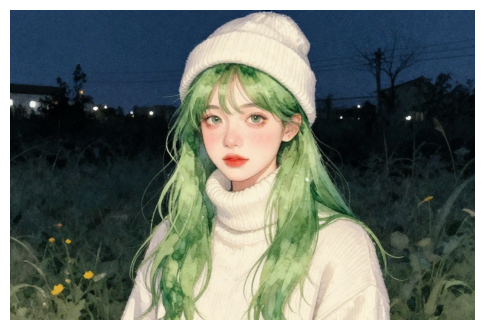

25269

In [3]:
from diffusers import ZImagePipeline

model_path = "./z-image-sd"
pipe = ZImagePipeline.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16,
).to("cuda")

pipe.transformer.set_attention_backend("flash")
pipe.enable_model_cpu_offload()

prompt = "masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck"
negative_prompt = "lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

# 2. Generate Image
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    height=512,
    width=768,
    num_inference_steps= 9,  # This actually results in 8 DiT forwards
    guidance_scale=0.0,     # Guidance should be 0 for the Turbo models
    generator=torch.Generator("cuda").manual_seed(1919810),
).images[0]

# 6. 显示图片
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

### lightx2v框架（需要python>=3.10，图生成视频）

In [41]:
import sys
print("Python版本：", sys.version)

Python版本： 3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]


In [27]:
#换了一台设备，是5080
import sys
print("Python版本：", sys.version)

Python版本： 3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:05:38) [MSC v.1929 64 bit (AMD64)]


不能用pip install lightx2v安装

In [9]:
!git clone https://github.com/ModelTC/LightX2V.git

Cloning into 'LightX2V'...


In [14]:
pip install -r ./LightX2V/requirements_win.txt

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Using cached https://mirrors.aliyun.com/pypi/packages/29/45/c0adfbfb0b5895aa18cec400c535b4f7ff3e52536e0403602fc1a23f7de9/ninja-1.13.0-py3-none-win_amd64.whl (309 kB)
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 1.1/1.1 MB 51.2 MB/s  0:00:00
     ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
     ---------------------------------------- 6.1/6.1 MB 62.2 MB/s  0:00:00

   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ---------------------------------------- 0/3 [torchao]
   ----------

In [10]:
pip install -v ./LightX2V

Using pip 25.3 from D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages\pip (python 3.12)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Processing d:\cs\notebookworkspace\pytorch-study\lightx2v
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Link requires a different Python (3.12.12 not in: '<3.12,>=3.8'): https://mirrors.aliyun.com/pypi/packages/d6/bd/2d13a273d95f7b7d9903c906c486040b0aebb85e008f93a5dd0891f21f1f/scipy-1.10.0.tar.gz#sha256=c8b3cbc636a87a89b770c6afc999baa6bcbb01691b5ccbbc1b1791c7c0a07540 (from https://mirrors.aliyun.com/pypi/simple/scipy/) (requires-python:<3.12,>=3.8)
  Link requires a different Python (3.12.12 not in: '<3.12,>=3.8'): https://mirrors.aliyun.com/pypi/pack

  Running command installing build dependencies
  Using pip 25.3 from D:\cs\Anaconda3-24-10\envs\pytorch-study\Lib\site-packages\pip (python 3.12)
  Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
       ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
       ---------------------------------- ----- 1.0/1.2 MB 49.2 MB/s eta 0:00:01
       ---------------------------------- ----- 1.0/1.2 MB 49.2 MB/s eta 0:00:01
       ---------------------------------------- 1.2/1.2 MB 1.8 MB/s  0:00:00
    Using cached https://mirrors.aliyun.com/pypi/packages/20/12/38679034af332785aac8774540895e234f4d07f7545804097de4b666afd8/packaging-25.0-py3-none-any.whl (66 kB)

    Creating C:\Users\weiss\AppData\Local\Temp\pip-build-env-ov2xitzx\overlay\Scripts

     ---------- ----------------------------- 1/4 [setuptools]
     ---------------------------------------- 4/4 [ninja]

  Running command Getting requirements to build wheel
  running egg_info
  creating lightx2v.egg-info
  

In [40]:
import lightx2v
print(f"LightX2V 版本: {lightx2v.__version__}")

LightX2V 版本: 0.1.0


**使用Wan2.1-T2V-1.3B文升图：16.3G, 最高显存占用18.5G**

In [1]:
from lightx2v import LightX2VPipeline
import torch

# ====================== 环境配置（5080 16G专用） ======================
torch.cuda.empty_cache()
torch.backends.cudnn.benchmark = True
torch.backends.cuda.matmul.allow_tf32 = True  # 5080开启TF32加速

# ====================== 初始化Pipeline（8bit量化核心） ======================
pipe = LightX2VPipeline(
    model_path="./Wan2.1-T2V-1.3B",
    model_cls="wan2.1",
    task="t2v",
)

def convert_model_to_fp16(model):
    for module in model.modules():
        # 仅转换支持FP16的层（避免报错）
        if hasattr(module, "weight") and module.weight is not None:
            module.half()
        if hasattr(module, "bias") and module.bias is not None:
            module.bias.half()
    return model

# 对pipe的核心模型组件转FP16（官方模型结构支持half()）
if hasattr(pipe, "model"):
    pipe.model = convert_model_to_fp16(pipe.model)

pipe.create_generator(
    attn_mode="sage_attn2",
    infer_steps=4,
    height=480, # 720
    width=480, # 1280
    num_frames=81,
    guidance_scale=5.0,
    sample_shift=5.0,
)

prompt = "Two anthropomorphic cats in comfy boxing gear and bright gloves fight intensely on a spotlighted stage."
negative_prompt = "镜头晃动，色调艳丽，过曝，静态，细节模糊不清，字幕，风格，作品，画作，画面，静止，整体发灰，最差质量，低质量，JPEG压缩残留，丑陋的，残缺的，多余的手指，画得不好的手部，画得不好的脸部，畸形的，毁容的，形态畸形的肢体，手指融合，静止不动的画面，杂乱的背景，三条腿，背景人很多，倒着走"
save_result_path="./data/StableDiffusion/output.mp4"

pipe.generate(
    seed=42,
    prompt=prompt,
    negative_prompt=negative_prompt,
    save_result_path=save_result_path,
)
print(f"动画视频生成完成！保存至：{save_result_path}")

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

2025-12-29 17:07:31.226 | INFO     | lightx2v_platform.base.base:init_ai_device:16 - Initialized AI_DEVICE: cuda
2025-12-29 17:07:31.238 | INFO     | lightx2v_platform.base.base:check_ai_device:33 - AI device for platform 'cuda' is available.
Skipping import of cpp extensions due to incompatible torch version 2.8.0+cu128 for torchao version 0.15.0             Please see https://github.com/pytorch/ao/issues/2919 for more info
W1229 17:07:34.151000 8112 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
2025-12-29 17:07:35.988 | INFO     | lightx2v.common.ops.attn.flash_attn:<module>:7 - flash_attn_varlen_func not found, please install flash_attn2 first
2025-12-29 17:07:35.989 | INFO     | lightx2v.common.ops.attn.flash_attn:<module>:13 - flash_attn_varlen_func_v3 not found, please install flash_attn3 first
2025-12-29 17:07:35.993 | INFO     | lightx2v.common.ops.attn.ring_attn:<module>:16 - flash_attn

动画视频生成完成！保存至：./data/StableDiffusion/output.mp4


2207

In [7]:
from IPython.display import Video

# 显示本地视频（替换为你的视频路径）
video_path = "./data/StableDiffusion/output.mp4"  # 你生成的视频路径
Video(video_path, width=480, height=480, embed=True)

**目前还未成功**  
在命令行激活当前python环境，然后执行下面命令， **117G注意** wan2.2文生视频模型  
huggingface-cli download Wan-AI/Wan2.2-T2V-A14B --local-dir ./Wan2.2-T2V-A14B

In [3]:
# from lightx2v import LightX2VPipeline
# import torch

# # ====================== 环境配置（5080 16G专用） ======================
# torch.cuda.empty_cache()
# torch.backends.cudnn.benchmark = True
# torch.backends.cuda.matmul.allow_tf32 = True  # 5080开启TF32加速

# # ====================== 初始化Pipeline（8bit量化核心） ======================
# pipe = LightX2VPipeline(
#     model_path="./Wan2.2-T2V-A14B",
#     model_cls="wan2.2",
#     task="t2v",
# )

# pipe.create_generator(
#     attn_mode="sage_attn2",
#     infer_steps=50,
#     height=480, # 720
#     width=832, # 1280
#     num_frames=81,
#     guidance_scale=5.0,
#     sample_shift=5.0,
# )

# prompt = "Two anthropomorphic cats in comfy boxing gear and bright gloves fight intensely on a spotlighted stage."
# negative_prompt = "镜头晃动，色调艳丽，过曝，静态，细节模糊不清，字幕，风格，作品，画作，画面，静止，整体发灰，最差质量，低质量，JPEG压缩残留，丑陋的，残缺的，多余的手指，画得不好的手部，画得不好的脸部，畸形的，毁容的，形态畸形的肢体，手指融合，静止不动的画面，杂乱的背景，三条腿，背景人很多，倒着走"
# save_result_path="./data/StableDiffusion/output.mp4"

# pipe.generate(
#     seed=42,
#     prompt=prompt,
#     negative_prompt=negative_prompt,
#     save_result_path=save_result_path,
# )
# print(f"动画视频生成完成！保存至：{save_result_path}")

## 学习使用ControlNet 可控生图 的使用

## 学习LoRA微调

## StableDiffusion的详细实现

## 学习使用ComfyUI（可能写不到这上面来）